# Telco Churn

### PLANNING---Acquisition---Preparation---Exploration---Modeling---Delivery
# Project planning:
* Aquire data from MySQL
 
* Prepare data
   * Create Engineered columns from existing data
       * churn
       * gender
       * partner
       * dependents
       * phone_service
       * paperless_billing
 
* Explore data in search of drivers of churn
   * Answer the following initial questions
       * Are there any surprises in the data?
       * Does a month-to-month contract lead to higher rate of churn?
       * How often has churn occured compared to no churn?
       * Does gender affect churn?
       * Does whether the customer has a partner affect churn?
       * Does whether the customer has dependents affect churn?
       * Does phone service type affect churn?
       * Does whether the customer uses paperless billing affect churn?
      
* Develop a Model to predict if a customer will churn
   * Use drivers identified in explore to build predictive models of different types
   * Evaluate models on train and validate data
   * Select the best model based on highest accuracy
   * Evaluate the best model on test data


# Goals:
* Discover the drivers of churn in the telco dataset
* Use drivers to develop a machine learning model to predict whether a customer will churn

# Imports

In [135]:
# Imports
from pydataset import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from acquire import get_telco_data,\
train_val_test
from sklearn.model_selection import train_test_split
from sklearn.metrics import \
accuracy_score,\
recall_score,\
precision_score,\
confusion_matrix,\
classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.tree import\
DecisionTreeClassifier as DT,\
plot_tree
from prepare import prep_telco
from scipy import stats
from sklearn.metrics import ConfusionMatrixDisplay

### Planning---ACQUISITION---Preparation---Exploration---Modeling---Delivery


# Grabbing the dataset

In [74]:
# Using the get_telco_data function from acquire
df = get_telco_data('telco_churn')
df.head().T

,0,1,2,3,4
payment_type_id,2,2,1,1,2
internet_service_type_id,1,1,2,2,2
contract_type_id,2,1,1,1,1
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes


In [75]:
# Looking at what types of data we're working with
df.dtypes

payment_type_id               int64
internet_service_type_id      int64
contract_type_id              int64
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
dtype: object

### Planning---Acquisition---PREPARATION---Exploration---Modeling---Delivery


# Preparing the data

### Encoding all categorical variables using the prep_telco function in prepare, not dropping any columns or imputing because there are no nulls

In [76]:
# Encoding all categorical variables using the prep_telco function in prepare, not dropping any columns or imputing because there are no nulls
prep_telco(df).T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
payment_type_id,2,2,1,1,2,4,3,4,1,2,...,2,3,2,2,3,2,1,2,2,1
internet_service_type_id,1,1,2,2,2,1,2,2,1,1,...,3,2,2,2,3,1,2,1,1,1
contract_type_id,2,1,1,1,1,1,3,3,1,3,...,1,2,2,1,1,2,1,1,3,3
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9975-SKRNR,9978-HYCIN,9979-RGMZT,9985-MWVIX,9986-BONCE,9987-LUTYD,9992-RRAMN,9992-UJOEL,9993-LHIEB,9995-HOTOH
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Male,Male,Female,Female,Female,Female,Male,Male,Male,Male
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,No,No,No,No,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,Yes,No,No,No,No,No,No,Yes,Yes
tenure,9,9,4,13,3,9,71,63,7,65,...,1,47,7,1,4,13,22,2,67,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No


# Splitting the data

* Using our function from acquire to split the data into samples that we can train, validate, and test machine learning algorithms on, and showing baseline accuracy


In [77]:
# Using our function from acquire to split the data into samples that we can train, validate, and test machine learning algorithms on, and showing baseline accuracy
train, validate, test = train_val_test(df, 'churn')
train['baseline_prediction'] = 'No'
baseline_accuracy = (train.baseline_prediction == train.churn).mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 73.46%


### Planning---Acquisition---Preparation---EXPLORATION---Modeling---Delivery


# Exploration

### Let's take a look at the data we will be using to answer questions.


In [133]:
# Let's take a look at the data we will be using to answer questions
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 1781 to 5354
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   payment_type_id            5634 non-null   int64  
 1   internet_service_type_id   5634 non-null   int64  
 2   contract_type_id           5634 non-null   int64  
 3   customer_id                5634 non-null   object 
 4   gender                     5634 non-null   object 
 5   senior_citizen             5634 non-null   int64  
 6   partner                    5634 non-null   object 
 7   dependents                 5634 non-null   object 
 8   tenure                     5634 non-null   int64  
 9   phone_service              5634 non-null   object 
 10  multiple_lines             5634 non-null   object 
 11  online_security            5634 non-null   object 
 12  online_backup              5634 non-null   object 
 13  device_protection          5634 non-null   object 

### Taking a look at the distribution of churn.

In [79]:
# Taking a look at the distribution of churn.

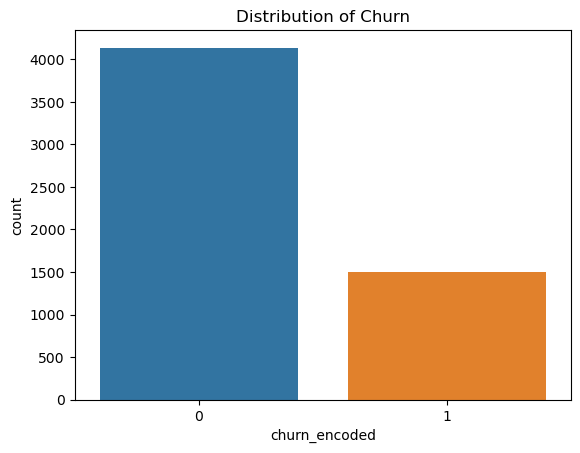

In [80]:
sns.countplot(data=train, x='churn_encoded')
plt.title('Distribution of Churn')
plt.show()

# Graphing the data to find drivers of churn

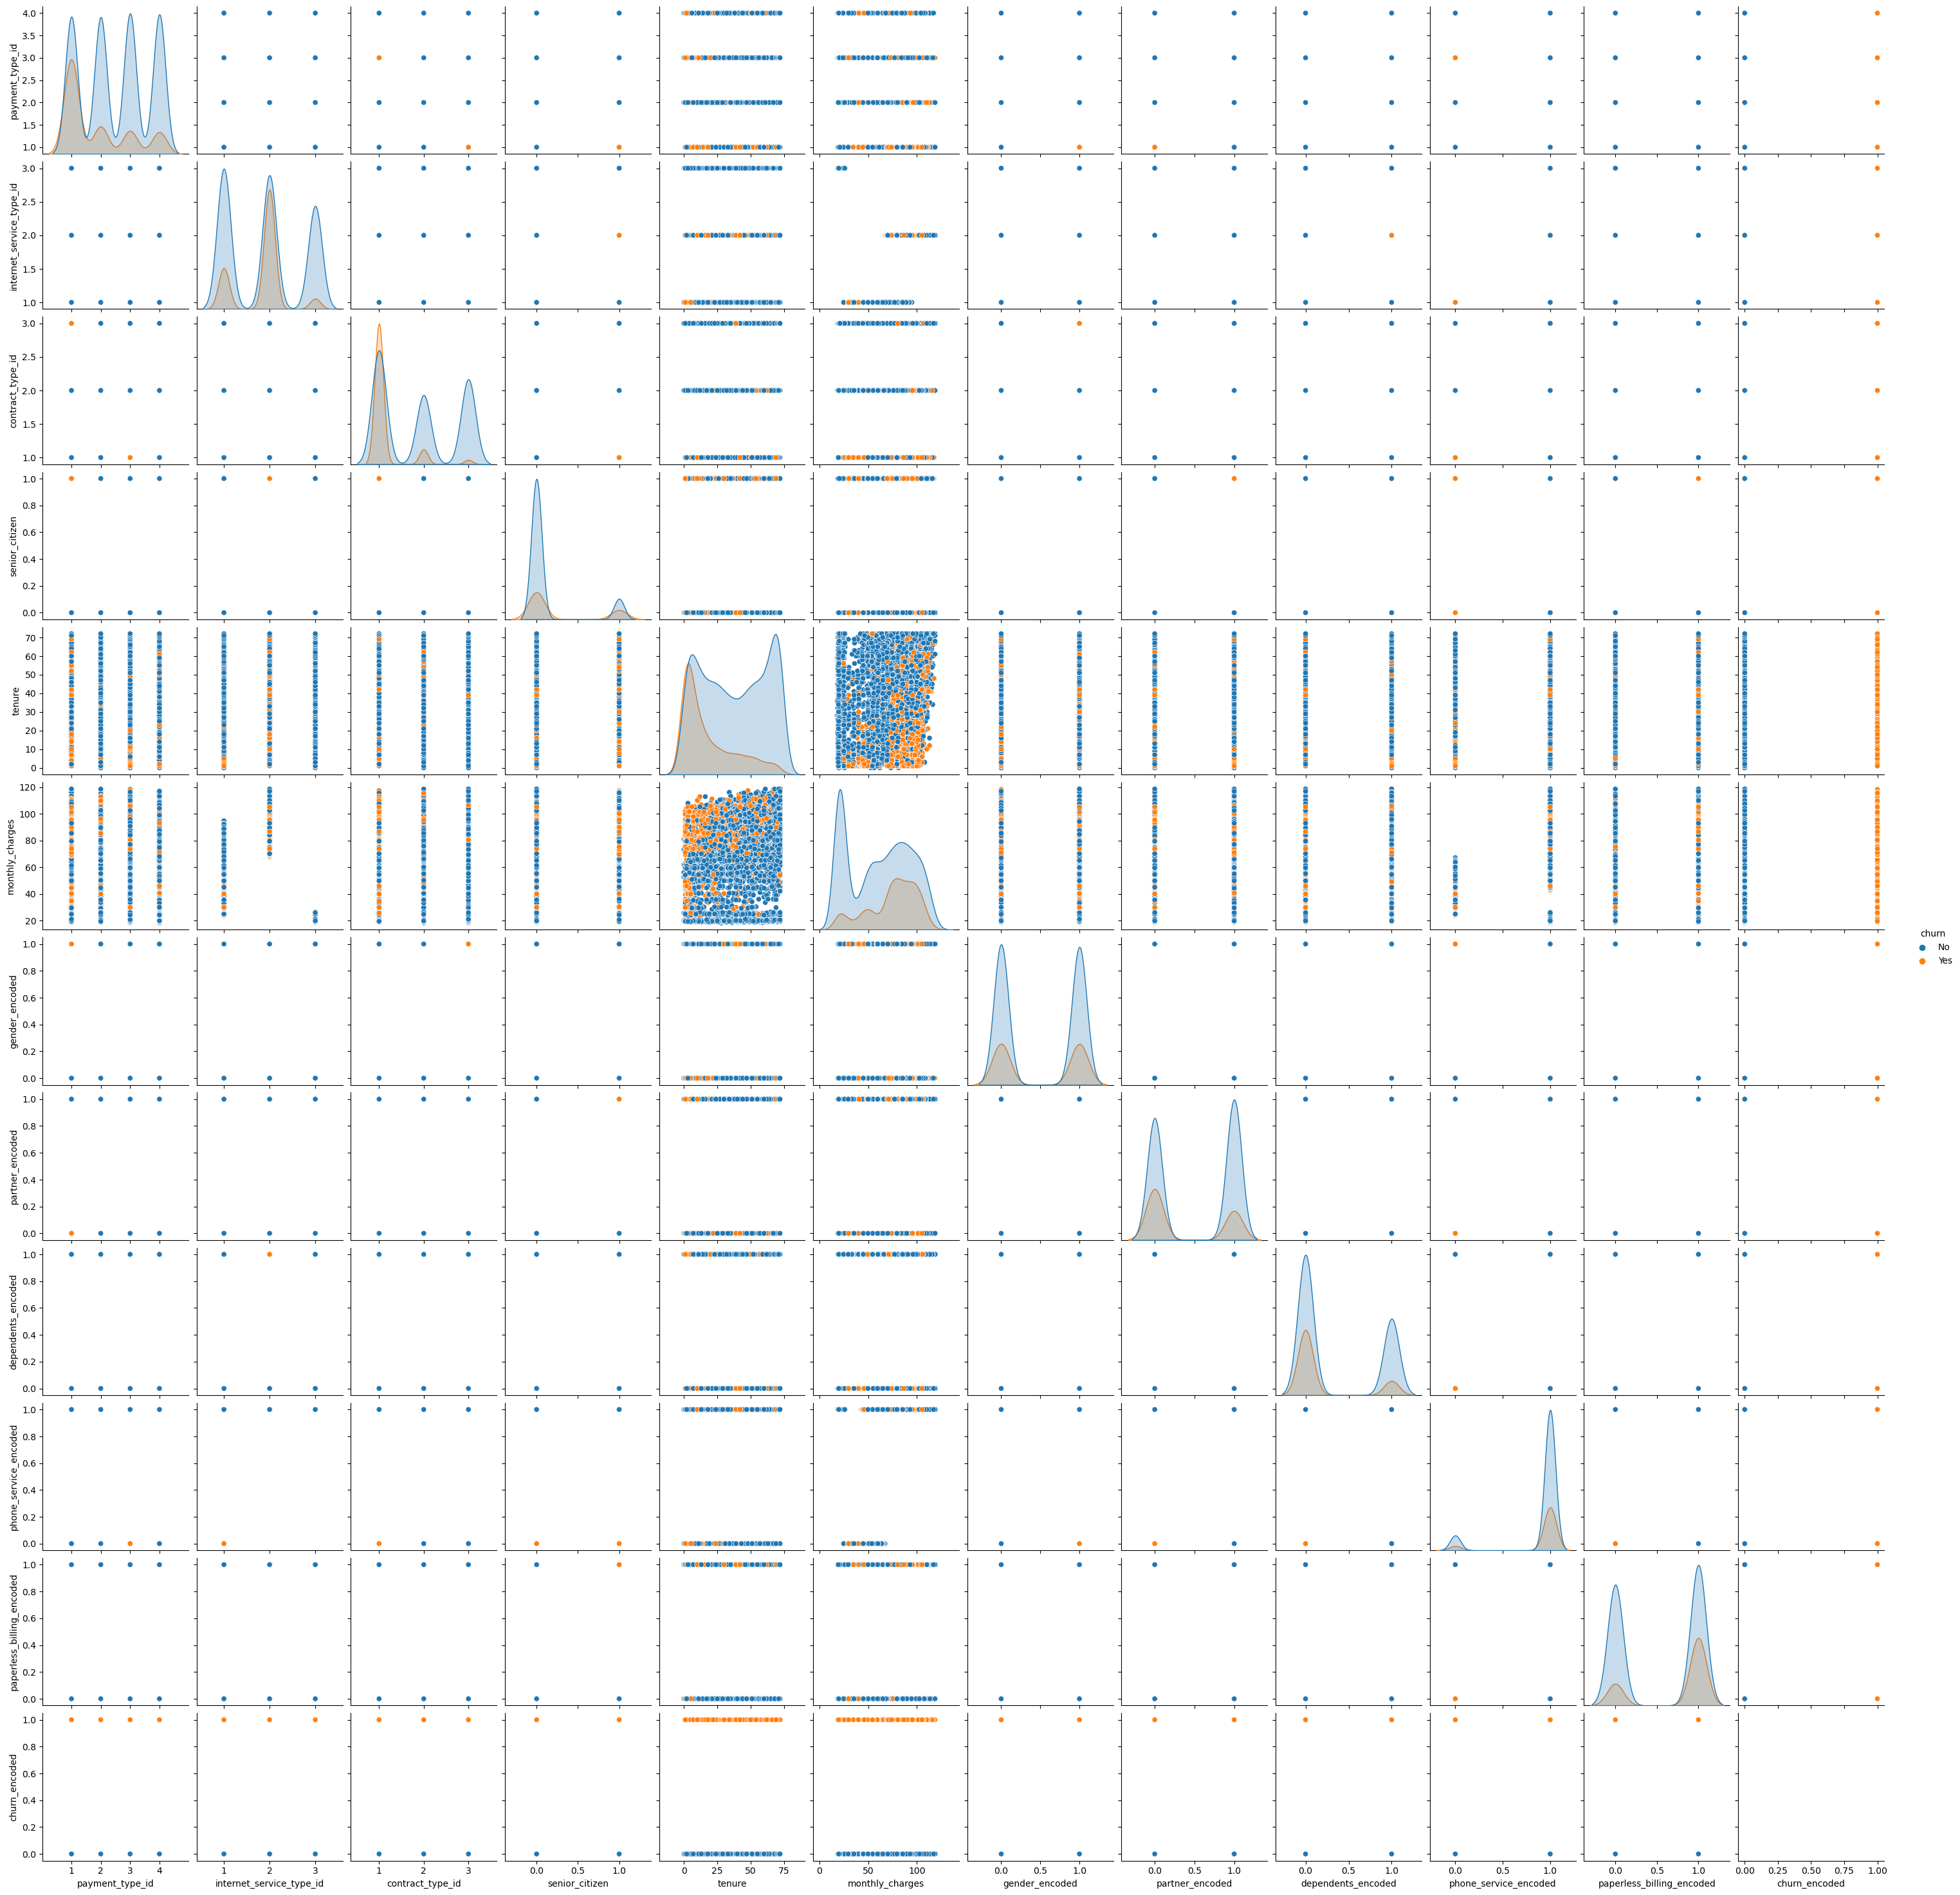

In [81]:
# Graph the data with churn
quan= []
for col in train:
    if ((train[col].dtype=='float64') | (train[col].dtype=='int')):
        quan.append(col)
sns.pairplot(data=train, vars=quan, hue='churn')
plt.show()

## While all the graphs in this pairplot aren't useful, this gives us several graphs in one picture for the variables we suspect will affect churn.

# Some of my takeaways:

### Gender seems to be split evenly with no one gender churning more, so I will not explore this relationship.

### It looks like there might be a correlation between contract type and churn, as contract type id 1 has a much higher rate of churn than 2 or 3.
* If you look at the data, this is matching instances of contract type where it is month-to-month.
## Before we perform stats tests to see how strong the connection is, let's use our train split and a decision tree algorithm to start the process of finding the right model.

### Planning---Acquisition---Preparation---Exploration---MODELING---Delivery


In [82]:
# The graph suggests that there is a correlation between tenure and churn, where longer tenure correlates with less churn,
# but that seems obvious as you won't have a long tenure if you leave. Therefore, I will not explore this relationship
# Gender seems to be split evenly with no one gender churning more, so I will not explore this relationship.
# It looks like there might be a correlation between contract type and churn, as contract type id 1 has a much higher rate of churn than 2 or 3.
# If you look at the data, this is matching instances of contract type where it is month-to-month.
# So, let's test if there is a connection using our train split and a decision tree algorithm.

In [83]:
# Make a decision tree based on contract type 1 (month-to-month)
train['label'] = train.contract_type_id == 1
clf = DT(max_depth=2)
X_train = train.drop(columns=['churn', 'label', 'multiple_lines', 'online_security',
                            'contract_type_id', 'senior_citizen', 
                            'tenure', 'gender', 'partner', 'customer_id', 'baseline_prediction', 
                            'dependents', 'phone_service', 'total_charges', 'tech_support', 'device_protection',
                            'streaming_tv', 'streaming_movies', 'online_backup',
                            'paperless_billing', 'contract_type', 'internet_service_type', 'payment_type', 'gender_encoded', 'partner_encoded'])
y_train = train[['label']]
clf.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=2)

### Vizualizing our findings

In [ ]:
# Vizualizing our findings

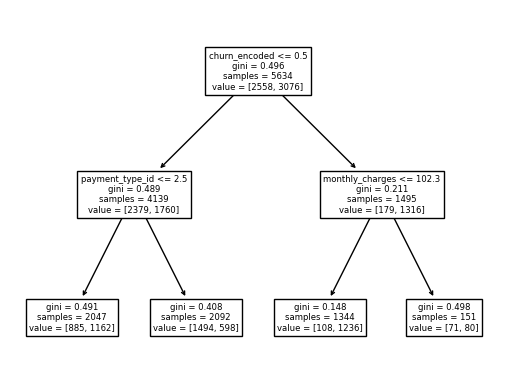

In [84]:
plot_tree(clf, feature_names= X_train.columns.to_list())
plt.show()

### Let's look at our first model's performance

In [85]:
# predict off of the dataset and look at the performance of the model
model_1_preds = clf.predict(X_train)
print(classification_report(y_train, model_1_preds))

              precision    recall  f1-score   support

       False       0.71      0.58      0.64      2558
        True       0.70      0.81      0.75      3076

    accuracy                           0.71      5634
   macro avg       0.71      0.69      0.70      5634
weighted avg       0.71      0.71      0.70      5634



### Baseline accuracy was about 73%, so 71% is a little low. I don't think this is the right model for our data.
## Lets run a logistic regression model on contract type id, internet service type id, and payment type id, since they seem to have the most correlation with churn on our pairplot.

In [86]:
# Baseline accuracy was about 73%, so 71% is a little low. I don't think this is the right model for our data.
# Lets run a logistic regression model on contract type id, internet service type id, and payment type id, 
# since they seem to have the most correlation with churn on our pairplot

In [87]:
# Do not drop contract type id, internet service type id, or payment type id. look at contract type id, internet service type id, and payment type id
X_train = train.drop(columns=['churn', 'label', 'multiple_lines', 'online_security', 'senior_citizen', 
                            'tenure', 'gender', 'partner', 'customer_id', 'baseline_prediction', 
                            'dependents', 'phone_service', 'total_charges', 'tech_support', 'device_protection',
                            'streaming_tv', 'streaming_movies', 'online_backup',
                            'paperless_billing', 'contract_type', 'internet_service_type', 'payment_type',
                            'gender_encoded', 'partner_encoded', 'dependents_encoded', 'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded'])
y_train = train.churn_encoded
logit = LogisticRegression(C=1, random_state=123)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      4139
           1       0.57      0.41      0.48      1495

    accuracy                           0.76      5634
   macro avg       0.69      0.65      0.66      5634
weighted avg       0.74      0.76      0.75      5634



### Our logistic regression model performs with 76% accuracy, slightly better than our 73% baseline. Let's try different 'C' values.

In [88]:
# Our logistic regression model performs with 76% accuracy, slightly better than our 73% baseline. let's try different 'C' values

In [89]:
# C=10
logit = LogisticRegression(C=10, random_state=123)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      4139
           1       0.57      0.41      0.48      1495

    accuracy                           0.76      5634
   macro avg       0.69      0.65      0.66      5634
weighted avg       0.74      0.76      0.75      5634



In [90]:
# C=100
logit = LogisticRegression(C=100, random_state=123)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      4139
           1       0.57      0.41      0.48      1495

    accuracy                           0.76      5634
   macro avg       0.69      0.65      0.66      5634
weighted avg       0.74      0.76      0.75      5634



In [91]:
# C=.1
logit = LogisticRegression(C=.1, random_state=123)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      4139
           1       0.57      0.40      0.47      1495

    accuracy                           0.76      5634
   macro avg       0.69      0.65      0.66      5634
weighted avg       0.74      0.76      0.75      5634



### No significant difference in metrics after changing 'C', so I'll go with my original C=1 and move on to validation.
### First, we'll check baseline accuracy within the validate split.

In [92]:
# No significant difference in metrics after changing 'C', so I'll go with my original C=1 and move on to validation.
# First, we'll check baseline accuracy within the validate split.

In [93]:
# finding baseline accuracy on the validate set
validate['baseline_prediction'] = 'No'
baseline_accuracy = (validate.baseline_prediction == validate.churn).mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 73.44%


* Noting this is only .02 away from the train baseline accuracy, so my datasets are well-split.

In [94]:
# Noting this is only .02 away from the train baseline accuracy, so my datasets are well-split.

In [95]:
# Using the same columns but on the validate set
X_validate = validate.drop(columns=['churn', 'multiple_lines', 'online_security', 'senior_citizen', 
                            'tenure', 'gender', 'partner', 'customer_id', 'baseline_prediction', 
                            'dependents', 'phone_service', 'total_charges', 'tech_support', 'device_protection',
                            'streaming_tv', 'streaming_movies', 'online_backup',
                            'paperless_billing', 'contract_type', 'internet_service_type', 'payment_type', 'gender_encoded', 'partner_encoded', 'churn_encoded'])
y_validate = validate.churn_encoded
logit = LogisticRegression(C=1, random_state=123)
logit.fit(X_validate, y_validate)
y_pred = logit.predict(X_validate)
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       517
           1       0.62      0.49      0.55       187

    accuracy                           0.79       704
   macro avg       0.73      0.69      0.70       704
weighted avg       0.77      0.79      0.78       704



### Our validate set gives us 79% accuracy rather than the 76% in train. This logistic regression model is our most accurate so far, and there is not much disparity between accuracy in train and validate.

* Just as before, when C=.1 the model is slightly less accurate, while C=10 and C=100 perform the same as my original C=1, so in this case I will keep C=1.
### Let's move on to the test split with logistic regression, starting with baseline accuracy.

In [96]:
# Our validate set gives us 79% accuracy rather than the 76% in train. This logistic regression model is our most accurate so far,
# and there is not much disparity between accuracy in train and validate.
# Just as before, when C=.1 the model is slightly less accurate, while C=10 and C=100 perform the same as my original C=1, so in this case I will keep C=1.
# Let's move on to the test split with logistic regression, starting with baseline accuracy.

In [97]:
# Finding baseline accuracy of the test split
test['baseline_prediction'] = 'No'
baseline_accuracy = (test.baseline_prediction == test.churn).mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 73.48%


* Again, only .04 away, so my data is split well
### Let's run the model on our test set.

In [98]:
# Again, only .04 away, so my data is split well
# Let's run the model on our test set.

In [99]:
# Running the logistic regression model on the test set finally
X_test = test.drop(columns=['churn', 'multiple_lines', 'online_security', 'senior_citizen', 
                            'tenure', 'gender', 'partner', 'customer_id', 'baseline_prediction', 
                            'dependents', 'phone_service', 'total_charges', 'tech_support', 'device_protection',
                            'streaming_tv', 'streaming_movies', 'online_backup',
                            'paperless_billing', 'contract_type', 'internet_service_type', 'payment_type', 'gender_encoded', 'partner_encoded', 'churn_encoded'])
y_test = test.churn_encoded
logit = LogisticRegression(C=1, random_state=123)
logit.fit(X_test, y_test)
y_pred = logit.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       518
           1       0.61      0.44      0.51       187

    accuracy                           0.78       705
   macro avg       0.71      0.67      0.68       705
weighted avg       0.76      0.78      0.76       705



## My takeaways:
### The model on the test split is 78% accurate, as compared to 79% on validate and 76% on train. There is minimal disparity between the accuracy of our splits using this logistic regression model, showing consistency. It's looking like we should stick with this model so far.
# Let's try out a KNN model and compare accuracy to our other models.

In [100]:
# The model on the test split is 78% accurate, as compared to 79% on validate and 76% on train. There is minimal disparity between the 
# accuracy of our splits using this logistic regression model, showing consistency. It's looking like we should stick with this model so far.
# Let's try out a KNN model and compare accuracy to our other models.

In [101]:
# Running the KNN model on our train set first
X_train = train.drop(columns=['churn', 'label', 'multiple_lines', 'online_security', 'senior_citizen', 
                            'tenure', 'gender', 'partner', 'customer_id', 'baseline_prediction', 
                            'dependents', 'phone_service', 'total_charges', 'tech_support', 'device_protection',
                            'streaming_tv', 'streaming_movies', 'online_backup',
                            'paperless_billing', 'contract_type', 'internet_service_type', 'payment_type', 'gender_encoded', 'partner_encoded', 'churn_encoded'])
y_train = train.churn_encoded
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4139
           1       0.69      0.60      0.64      1495

    accuracy                           0.82      5634
   macro avg       0.78      0.75      0.76      5634
weighted avg       0.82      0.82      0.82      5634



### Visualizing our findings

In [ ]:
# Vizualizing our findings

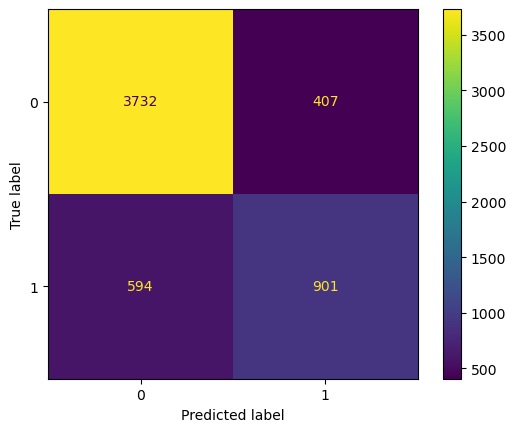

In [103]:
cm = confusion_matrix(y_train, y_pred)
cm_disp = ConfusionMatrixDisplay(cm, display_labels=knn.classes_)
cm_disp.plot()
plt.show()

### Well, our KNN model already outscores the other two with an 82% accuracy. Let's run it on validate and test.

In [104]:
# Well, our KNN model already outscores the other two with an 82% accuracy. Let's run it on validate and test.

In [105]:
# Running KNN on validate
X_validate = validate.drop(columns=['churn', 'multiple_lines', 'online_security', 'senior_citizen', 
                            'tenure', 'gender', 'partner', 'customer_id', 'baseline_prediction', 
                            'dependents', 'phone_service', 'total_charges', 'tech_support', 'device_protection',
                            'streaming_tv', 'streaming_movies', 'online_backup',
                            'paperless_billing', 'contract_type', 'internet_service_type', 'payment_type', 'gender_encoded', 'partner_encoded', 'churn_encoded'])
y_validate = validate.churn_encoded
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_validate, y_validate)
y_pred = knn.predict(X_validate)
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       517
           1       0.65      0.63      0.64       187

    accuracy                           0.81       704
   macro avg       0.76      0.75      0.75       704
weighted avg       0.81      0.81      0.81       704



* Not much disparity (1%)

In [106]:
# Not much disparity (1%)

In [131]:
# Finally, running KNN on the test set
X_test = test.drop(columns=['churn', 'multiple_lines', 'online_security', 'senior_citizen', 
                            'tenure', 'gender', 'partner', 'customer_id', 'baseline_prediction', 
                            'dependents', 'phone_service', 'total_charges', 'tech_support', 'device_protection',
                            'streaming_tv', 'streaming_movies', 'online_backup',
                            'paperless_billing', 'contract_type', 'internet_service_type', 'payment_type', 'gender_encoded', 'partner_encoded', 'churn_encoded'])
y_test = test.churn_encoded
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_test, y_test)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       518
           1       0.69      0.53      0.60       187

    accuracy                           0.81       705
   macro avg       0.77      0.72      0.74       705
weighted avg       0.80      0.81      0.80       705



### Vizualing our findings

In [ ]:
# Vizualing our findings

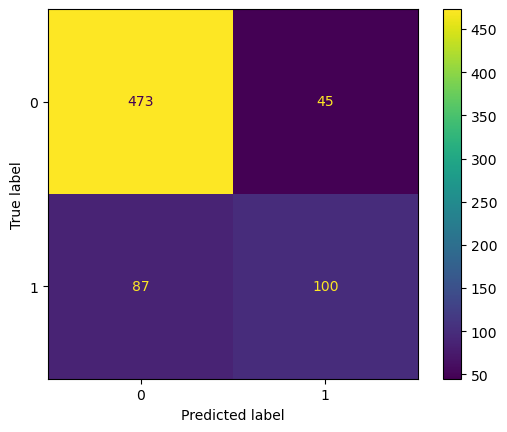

In [132]:
cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(cm, display_labels=knn.classes_)
cm_disp.plot()
plt.show()

## My takeaways:
### The test set has the same accuracy as train and is only 1% away from validate. This model is extremely consistent.


# My 3 best models are KNN as the best, then logistic regression, then decision tree.

In [108]:
# The test set has the same accuracy as train and is only 1% away from validate. This model is extremely consistent.
# My 3 best models are KNN as the best, then logistic regression, then decision tree.

### Taking a look back at the columns we have been using with churn


In [109]:
# Taking a look back at the columns we have been using with churn
X_train = train.drop(columns=['churn', 'label', 'multiple_lines', 'online_security', 'senior_citizen', 
                            'tenure', 'gender', 'partner', 'customer_id', 'baseline_prediction', 
                            'dependents', 'phone_service', 'total_charges', 'tech_support', 'device_protection',
                            'streaming_tv', 'streaming_movies', 'online_backup',
                            'paperless_billing', 'contract_type', 'internet_service_type', 'payment_type',
                            'gender_encoded', 'partner_encoded', 'dependents_encoded', 'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded'])
X_train

,payment_type_id,internet_service_type_id,contract_type_id,monthly_charges
1781,3,1,1,43.80
2804,1,2,1,91.30
1125,1,1,3,91.70
4112,3,1,3,80.40
3568,4,2,2,106.00
...,...,...,...,...
4999,3,1,3,59.60
6892,4,2,3,116.95
6806,1,2,1,105.20
1629,1,2,1,93.00


# Our models confirm that payment type, internet service type, contract type, and monthly charges all affect rate of churn.
# We can test each of these individually to reaffirm these are drivers of churn.
### Because these columns are categorical, we will use chi2 testing.

* Null hypothesis: There is not an association between contract type and churn. They are independent.
* Alternative hypothesis: There is an association between contract type and churn. They are not independent.

In [110]:
# Our models confirm that payment type, internet service type, contract type, and monthly charges all affect rate of churn.
# We can test each of these individually to reaffirm these are drivers of churn.
# Because these columns are categorical, we will use chi2 testing.
# Null hypothesis: There is not an association between contract type and churn. They are independent.
# Alternative hypothesis: There is an association between contract type and churn. They are not independent.

In [111]:
# Running a chi2 test on two categorical variables, starting with contract type and churn
observed = pd.crosstab(train['contract_type_id'], train['churn_encoded'])
observed

churn_encoded,0,1
contract_type_id,,
1,1760,1316
2,1067,139
3,1312,40


In [112]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

3.724372211807149e-205

In [113]:
alpha = 0.05

if p < alpha:
    print('Reject the null hypothesis. Meaning, There is an association between contract type and churn. They are not independent.')
else:
    print('Fail to reject the null. Meaning, There is an association between contract type and churn. They are not independent.')

Reject the null hypothesis. Meaning, There is an association between contract type and churn. They are not independent.


# This confirms correlation between contract type 'month-to-month' and a higher rate churn. 
# Let's test payment type.

* Null hypothesis: There is not an association between payment type and churn. They are independent.
* Alternative hypothesis: There is an association between payment type and churn. They are not independent.

In [114]:
# This confirms correlation between contract type 'month-to-month' and a higher rate churn. 
# Let's test payment type.
# Null hypothesis: There is not an association between payment type and churn. They are independent.
# Alternative hypothesis: There is an association between payment type and churn. They are not independent.

In [115]:
# Runnin a chi2 test on payment type and churn
observed = pd.crosstab(train['payment_type_id'], train['churn_encoded'])
observed

churn_encoded,0,1
payment_type_id,,
1,1025,849
2,1022,245
3,1049,206
4,1043,195


In [116]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

1.1265237662265014e-110

In [117]:
alpha = 0.05

if p < alpha:
    print('Reject the null hypothesis. Meaning, There is an association between contract type and churn. They are not independent.')
else:
    print('Fail to reject the null. Meaning, There is an association between contract type and churn. They are not independent.')

Reject the null hypothesis. Meaning, There is an association between contract type and churn. They are not independent.


# We can confirm a correlation between payment type 'electronic check' and a higher rate of churn.
# Onto internet service type.

* Null hypothesis: There is not an association between internet service type and churn. They are independent.
* Alternative hypothesis: There is an association between internet service type and churn. They are not independent.

In [118]:
# We can confirm a correlation between payment type 'electronic check' and a higher rate of churn.
# Onto internet service type.
# Null hypothesis: There is not an association between internet service type and churn. They are independent.
# Alternative hypothesis: There is an association between internet service type and churn. They are not independent.

In [119]:
observed = pd.crosstab(train['internet_service_type_id'], train['churn_encoded'])
observed

churn_encoded,0,1
internet_service_type_id,,
1,1540,359
2,1468,1045
3,1131,91


In [120]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

4.943043421409521e-126

In [121]:
alpha = 0.05

if p < alpha:
    print('Reject the null hypothesis. Meaning, There is an association between contract type and churn. They are not independent.')
else:
    print('Fail to reject the null. Meaning, There is an association between contract type and churn. They are not independent.')

Reject the null hypothesis. Meaning, There is an association between contract type and churn. They are not independent.


# We can confirm a correlation between internet service type 'fiber optic' and a higher rate of churn.
# Now we can test our one continuous variable: monthly charges.
* We will use a t-test because monthly charges is continuous and churn encoded is categorical.

In [122]:
# We can confirm a correlation between internet service type 'fiber optic' and a higher rate of churn.
# Now we can test our one continuous variable: monthly charges.
# We will use a t-test because monthly charges is continuous and churn encoded is categorical.

In [123]:
# Running a t test because there is one continuous and one categorical variable
churn_charges = train[train.churn_encoded == 1]['monthly_charges']
not_churn_charges = train[train.churn_encoded != 1]['monthly_charges']
t_stat, p = stats.ttest_ind(churn_charges, not_churn_charges, equal_var=True)
t_stat, p

(14.617348536331175, 1.6011035798940708e-47)

In [124]:
if p < alpha:
    print('Reject the null hypothesis. Meaning, There is an association between monthly charge and churn. They are not independent.')
else:
    print('Fail to reject the null. Meaning, There is an association between monthly charge and churn. They are not independent.')

Reject the null hypothesis. Meaning, There is an association between monthly charge and churn. They are not independent.


# We can confirm a correlation between higher monthly charge and a higher rate of churn.


## The graph shows correlation between churn and 'partner_encoded', 'dependents_encoded', 'phone_service_encoded', and 'paperless_billing_encoded'. Since I was not able to fit them in the tests before because there were too many variables, we can run similar tests on these fields now.

In [125]:
# We can confirm a correlation between higher monthly charge and a higher rate of churn.
# The graph shows correlation between churn and 'partner_encoded', 'dependents_encoded', 'phone_service_encoded', and 'paperless_billing_encoded'. 
# Since I was not able to fit them in the tests before because there were too many variables, we can run similar tests on these fields now.

In [126]:
# chi2 on partner and churn
observed = pd.crosstab(train['partner_encoded'], train['churn_encoded'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis. Meaning, There is an association between partner and churn. They are not independent.')
else:
    print('Fail to reject the null. Meaning, There is an association between partner and churn. They are not independent.')

Reject the null hypothesis. Meaning, There is an association between partner and churn. They are not independent.


In [127]:
# chi2 on dependents and churn
observed = pd.crosstab(train['dependents_encoded'], train['churn_encoded'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis. Meaning, There is an association between dependents and churn. They are not independent.')
else:
    print('Fail to reject the null. Meaning, There is an association between dependents and churn. They are not independent.')

Reject the null hypothesis. Meaning, There is an association between dependents and churn. They are not independent.


In [128]:
# chi2 on phone service and churn
observed = pd.crosstab(train['phone_service_encoded'], train['churn_encoded'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis. Meaning, There is an association between phone service and churn. They are not independent.')
else:
    print('Fail to reject the null. Meaning, There is an association between phone service and churn. They are not independent.')

Fail to reject the null. Meaning, There is an association between phone service and churn. They are not independent.


In [129]:
# chi2 on paperless billing and churn
observed = pd.crosstab(train['paperless_billing_encoded'], train['churn_encoded'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis. Meaning, There is an association between paperless billing and churn. They are not independent.')
else:
    print('Fail to reject the null. Meaning, There is an association between paperless billing and churn. They are not independent.')

Reject the null hypothesis. Meaning, There is an association between paperless billing and churn. They are not independent.


# It looks like there is correlation between churn and partner, dependents, and paperless billing, but not churn and phone service.

### Planning---Acquisition---Preparation---Exploration---Modeling---DELIVERY


# My main takeaway is that the data shows a correlation between higher rates of churn and customers with month-to-month contracts, customers paying with an electronic check, customers with fiber optic internet service, customers who pay more monthly, customers with no partner, customers with no dependents, and customers who use paperless billing. 
### Customers paying with electronic check being tied to churn comes as a surprise, as well as those who use paperless billing. These could be examples of correlation without causation
# I would recommend an incentive to stay because I believe that a lack of one is leading month-to-month customers to leave, finding a way to make every customer's monthly payment closer to equal to each other because higher monthly cost is tied to higher churn, efforts to market other internet services over fiber optic because fiber optic is causing churn, which could be because of poor performance with the fiber optic inernet, which in that case should be looked into and improved, and efforts to market towards people with families because people without churn significantly more. 
### The rest of the drivers of churn are determined by outside forces that the company could not affect.

## If I had time, I would look at whether the variables affect each other more, and not just churn. For example, there could be a connection between people having more services overall and not churning because possibly they just have more money.

# Thank you for your time!

In [130]:
# It looks like there is correlation between churn and partner, dependents, and paperless billing, but not churn and phone service.
# My main takeaway is that the data shows a correlation between higher rates of churn and customers with month-to-month contracts, customers paying with an 
# electronic check, customers with fiber optic internet service, customers who pay more monthly, customers with no partner, customers with no dependents, 
# and customers who use paperless billing. 
# I would recommend longer contracts or an incentive to stay, finding a way to make every customer's monthly payment closer to equal to each other, 
# efforts to market other internet services over fiber optic, and efforts to market towards people with families. 
# The rest of the drivers of churn are determined by outside forces that the company could not affect.
# If I had time, I would look at whether the variables affect each other more, and not just churn. For example, there could be a connection between 
# people having more services overall and not churning because possibly they just have more money.